<a href="https://colab.research.google.com/github/k1ran242/Deep-Learning/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [5]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


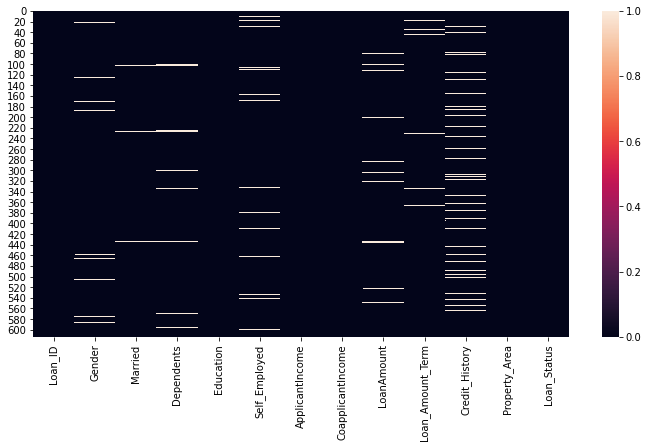

In [8]:
# Checking Null Values
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull())


In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


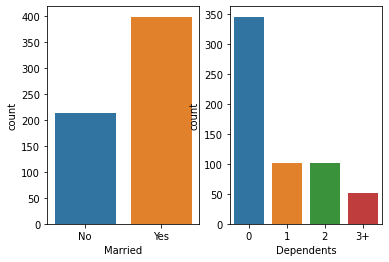

In [10]:
# visualizing feature 
plt.figure()
plt.subplot(1, 2, 1)
sns.countplot(data['Married'])
plt.subplot(1, 2, 2)
sns.countplot(data['Dependents'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


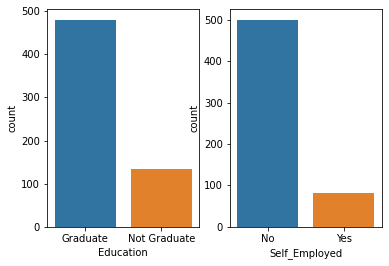

In [11]:
plt.figure()
plt.subplot(1, 2, 1)
sns.countplot(data['Education'])
plt.subplot(1, 2, 2)
sns.countplot(data['Self_Employed'])

''' by looking at the graphs we can say that features are imbalance so we fill null values by Random Sample Imputation
Creating function that simultaniously fill null values for other features too'''

In [12]:
def random_sampler(data,feature):
    data[feature+'_random']=data[feature]
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum(),random_state=101)
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature+'_random']=random_sample

In [13]:
random_sampler(data,'Gender')
random_sampler(data,'Married')
random_sampler(data,'Education')
random_sampler(data,'Self_Employed')
random_sampler(data,'Dependents')

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_random,Married_random,Education_random,Self_Employed_random,Dependents_random
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Male,No,Graduate,No,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Male,Yes,Graduate,No,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Male,Yes,Graduate,Yes,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Male,Yes,Not Graduate,No,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Male,No,Graduate,No,0


In [15]:
df=data.drop(['Gender','Married','Dependents','Education','Self_Employed'],axis=1)

In [16]:
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_random,Married_random,Education_random,Self_Employed_random,Dependents_random
0,LP001002,5849,0.0,NaN,360.0,1.0,Urban,Y,Male,No,Graduate,No,0
1,LP001003,4583,1508.0,128.0,360.0,1.0,Rural,N,Male,Yes,Graduate,No,1
2,LP001005,3000,0.0,66.0,360.0,1.0,Urban,Y,Male,Yes,Graduate,Yes,0
3,LP001006,2583,2358.0,120.0,360.0,1.0,Urban,Y,Male,Yes,Not Graduate,No,0
4,LP001008,6000,0.0,141.0,360.0,1.0,Urban,Y,Male,No,Graduate,No,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   ApplicantIncome       614 non-null    int64  
 2   CoapplicantIncome     614 non-null    float64
 3   LoanAmount            592 non-null    float64
 4   Loan_Amount_Term      600 non-null    float64
 5   Credit_History        564 non-null    float64
 6   Property_Area         614 non-null    object 
 7   Loan_Status           614 non-null    object 
 8   Gender_random         614 non-null    object 
 9   Married_random        614 non-null    object 
 10  Education_random      614 non-null    object 
 11  Self_Employed_random  614 non-null    object 
 12  Dependents_random     614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Now Handling Numerical Null Values...

In [18]:
def fill_nan(data,feature):
    median=data[feature].median()
    data[feature]=data[feature].fillna(median)

In [19]:
fill_nan(df,'LoanAmount')
fill_nan(df,'Loan_Amount_Term')
random_sampler(df,'Credit_History')

In [20]:
df.drop(['Credit_History'],axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                614 non-null    object 
 1   ApplicantIncome        614 non-null    int64  
 2   CoapplicantIncome      614 non-null    float64
 3   LoanAmount             614 non-null    float64
 4   Loan_Amount_Term       614 non-null    float64
 5   Property_Area          614 non-null    object 
 6   Loan_Status            614 non-null    object 
 7   Gender_random          614 non-null    object 
 8   Married_random         614 non-null    object 
 9   Education_random       614 non-null    object 
 10  Self_Employed_random   614 non-null    object 
 11  Dependents_random      614 non-null    object 
 12  Credit_History_random  614 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Checking For Outliers in Numeric Features
##### Fro ApplicantIncome feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


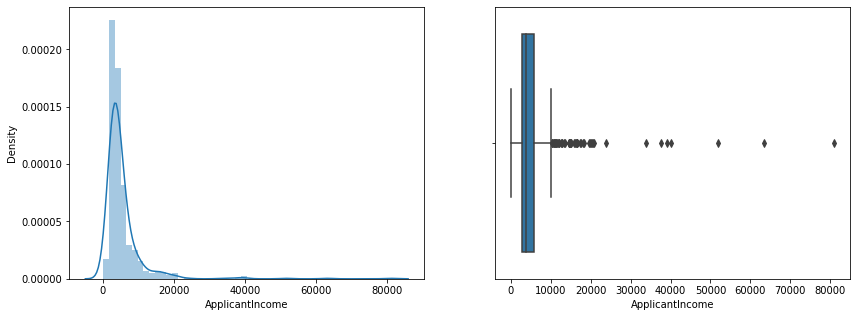

In [22]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.distplot(df['ApplicantIncome'])
plt.subplot(1, 2, 2)
sns.boxplot(df['ApplicantIncome'])


AS we can see ApplicantIncome feature having an outlier, so we have to eliminate that outlier
It seems ApplicantIncome feature is right skewed

In [23]:
IQR=df['ApplicantIncome'].quantile(0.75)-df['ApplicantIncome'].quantile(0.5)

upper_bridge=df['ApplicantIncome'].quantile(0.75)+(IQR*3)
lower_bridge=df['ApplicantIncome'].quantile(0.25)-(IQR*3)
print(upper_bridge),print(lower_bridge)
df.loc[df['ApplicantIncome']>=10000,'ApplicantIncome']=10000

11742.5
-3070.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


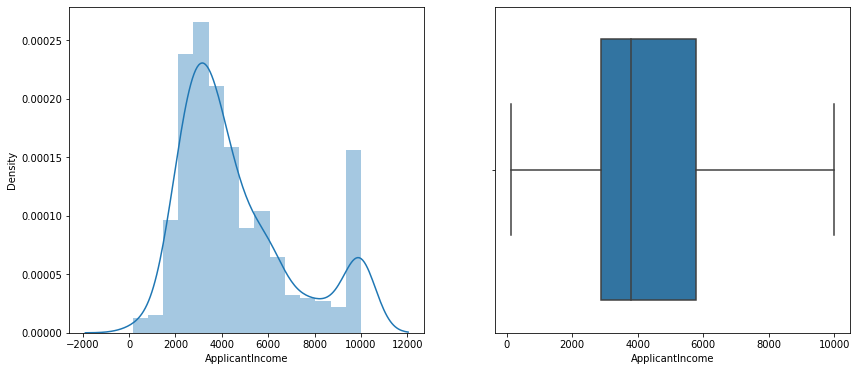

In [24]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.distplot(df['ApplicantIncome'])
plt.subplot(1, 2, 2)
sns.boxplot(df['ApplicantIncome'])

#### Fro CoapplicantIncome

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


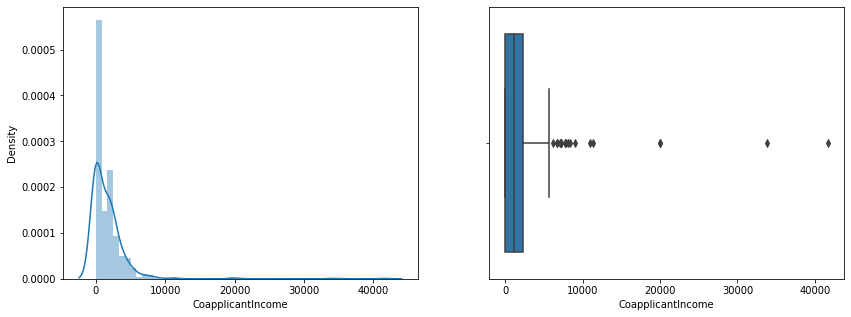

In [25]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.distplot(df['CoapplicantIncome'])
plt.subplot(1, 2, 2)
sns.boxplot(df['CoapplicantIncome'])

In [26]:
IQR=df['CoapplicantIncome'].quantile(0.75)-df['CoapplicantIncome'].quantile(0.5)
upper_bridge=df['CoapplicantIncome'].quantile(0.75)+(IQR*3)
lower_bridge=df['CoapplicantIncome'].quantile(0.25)-(IQR*3)
print(upper_bridge),print(lower_bridge)
df.loc[df['CoapplicantIncome']>=5600,'CoapplicantIncome']=5600

5623.5
-3326.25


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


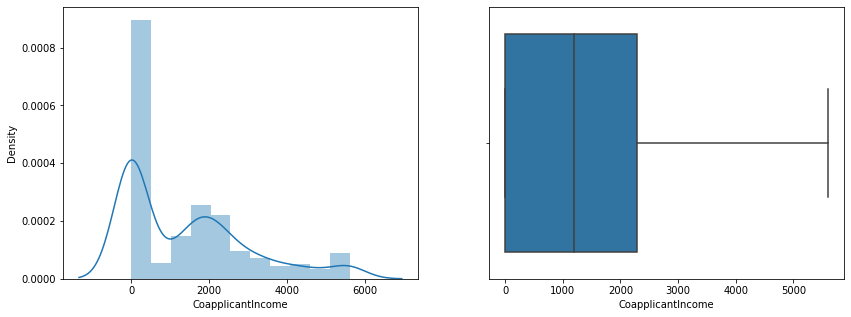

In [27]:

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.distplot(df['CoapplicantIncome'])
plt.subplot(1, 2, 2)
sns.boxplot(df['CoapplicantIncome'])

#### For LoanAmount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


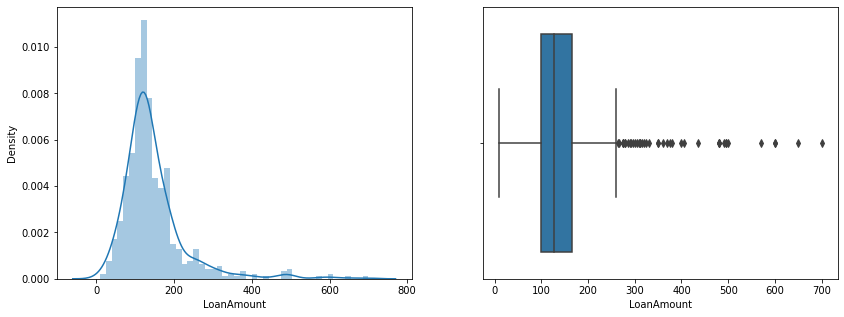

In [28]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.distplot(df['LoanAmount'])
plt.subplot(1, 2, 2)
sns.boxplot(df['LoanAmount'])

In [29]:
IQR=df['LoanAmount'].quantile(0.75)-df['LoanAmount'].quantile(0.5)
upper_bridge=df['LoanAmount'].quantile(0.75)+(IQR*3)
lower_bridge=df['LoanAmount'].quantile(0.25)-(IQR*3)
print(upper_bridge),print(lower_bridge)
df.loc[df['LoanAmount']>=275,'LoanAmount']=275

275.0
-10.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


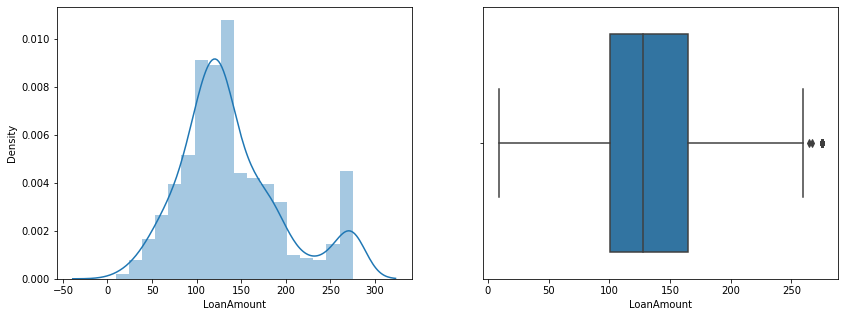

In [30]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.distplot(df['LoanAmount'])
plt.subplot(1, 2, 2)
sns.boxplot(df['LoanAmount'])

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### Now Handling Categorical Features

In [31]:
dummies=pd.get_dummies(df[['Property_Area','Gender_random','Married_random','Education_random','Self_Employed_random','Dependents_random']],drop_first=True)

In [32]:
df=df.drop(['Property_Area','Gender_random','Married_random','Education_random','Self_Employed_random','Dependents_random'],axis=1)

In [33]:
final_df=pd.concat([df,dummies],axis=1)
final_df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History_random,Property_Area_Semiurban,Property_Area_Urban,Gender_random_Male,Married_random_Yes,Education_random_Not Graduate,Self_Employed_random_Yes,Dependents_random_1,Dependents_random_2,Dependents_random_3+
0,LP001002,5849,0.0,128.0,360.0,Y,1.0,0,1,1,0,0,0,0,0,0
1,LP001003,4583,1508.0,128.0,360.0,N,1.0,0,0,1,1,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,Y,1.0,0,1,1,1,0,1,0,0,0
3,LP001006,2583,2358.0,120.0,360.0,Y,1.0,0,1,1,1,1,0,0,0,0
4,LP001008,6000,0.0,141.0,360.0,Y,1.0,0,1,1,0,0,0,0,0,0


In [34]:
target={'Y':1,'N':0}
final_df['Loan_Status']=final_df['Loan_Status'].map(target)

In [35]:
final_df.drop(['Loan_ID'],axis=1,inplace=True)

### Seperating Dependent feature and independent fetures

In [36]:
X=final_df.drop(['Loan_Status'],axis=1)
Y=final_df['Loan_Status']

In [37]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

#### Scaling the independent features

In [38]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [39]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
X_train.shape

(491, 14)

In [44]:
model=Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units= 10, kernel_initializer = 'he_uniform',activation='relu',input_dim = 14))
model.add(Dropout(0.3))
# Adding the second hidden layer
model.add(Dense(units= 5, kernel_initializer = 'he_uniform',activation='relu'))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:

# Fitting the ANN to the Training set
model_history=model.fit(X_train, y_train,validation_split=0.33, batch_size = 20, epochs = 150,validation_data=(X_test,y_test))

Epoch 1/150
17/17 [==============================] - 1s 18ms/step - loss: 0.7802 - accuracy: 0.6721 - val_loss: 0.6699 - val_accuracy: 0.6503
Epoch 2/150
17/17 [==============================] - 0s 4ms/step - loss: 0.7337 - accuracy: 0.6316 - val_loss: 0.6530 - val_accuracy: 0.6564
Epoch 3/150
17/17 [==============================] - 0s 5ms/step - loss: 0.7281 - accuracy: 0.6438 - val_loss: 0.6368 - val_accuracy: 0.6564
Epoch 4/150
17/17 [==============================] - 0s 4ms/step - loss: 0.7026 - accuracy: 0.6346 - val_loss: 0.6257 - val_accuracy: 0.6442
Epoch 5/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.6597 - val_loss: 0.6169 - val_accuracy: 0.6687
Epoch 6/150
17/17 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.6293 - val_loss: 0.6090 - val_accuracy: 0.6748
Epoch 7/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6711 - accuracy: 0.6392 - val_loss: 0.6038 - val_accuracy: 0.6810
Epoch 8/150


In [46]:
losses=pd.DataFrame(model.history.history)

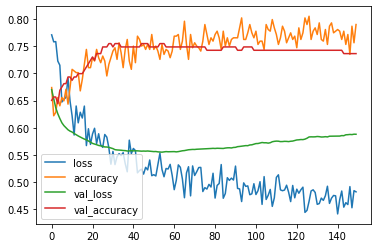

In [47]:
losses.plot()

In [53]:

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [54]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123

[[14 19]
 [ 3 87]]
